<a href="https://colab.research.google.com/github/MuthuDeep/MUTHUKUMARAN/blob/main/TEMP_MATE_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving messi1.jpg to messi1.jpg
Saving MESSSII.jpg to MESSSII.jpg


In [ ]:
!pip install python-resize-image

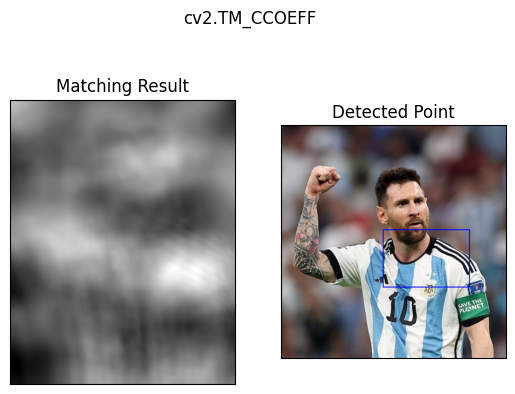

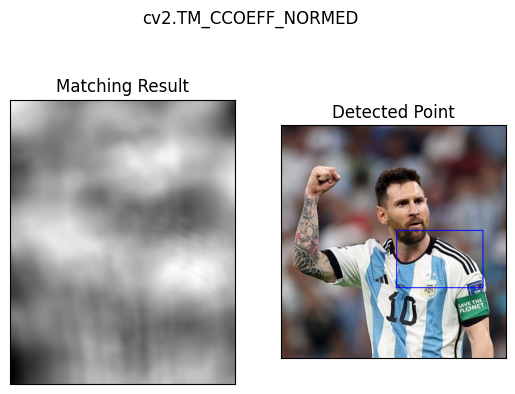

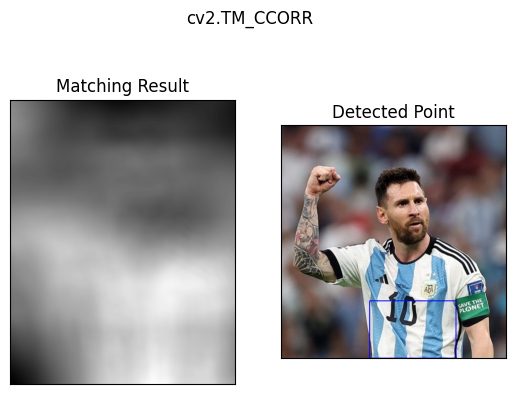

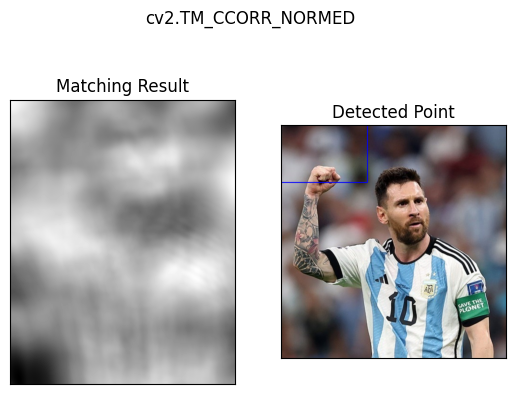

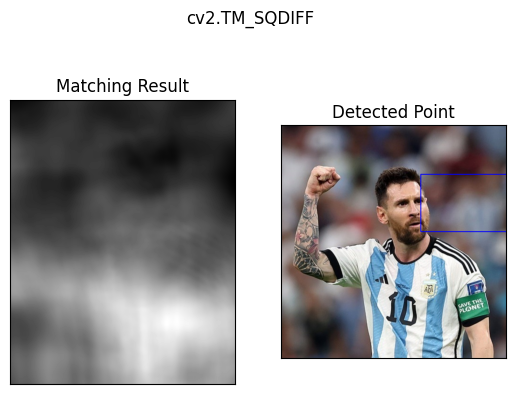

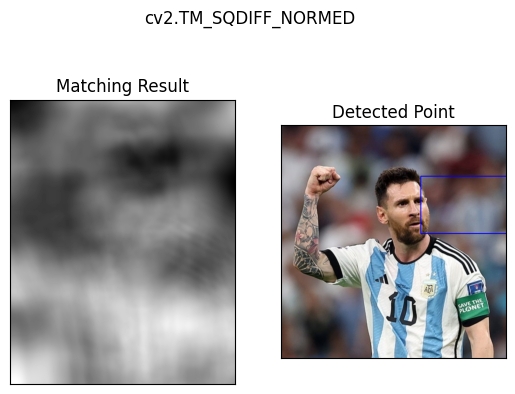

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files
from PIL import Image
import io
import os
from resizeimage import resizeimage
import shutil

# Read the uploaded images
img = cv2.imread('messi1.jpg')
template = cv2.imread('MESSSII.jpg')

# Check if the images were loaded correctly
if img is None:
    print("Error: Image not found for 'MESSSII.jpg'")
    exit()
if template is None:
    print("Error: Image not found for 'messi1.jpg'")
    exit()

img2 = img.copy()

# Get the width and height of the template
h, w = template.shape[:2]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
           'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv2.matchTemplate(img, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img, top_left, bottom_right, 255, 2)
    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()